In [1]:
from ALS.CP import solve_multiple_runways_cp,solve_single_runway_cp
from ALS.MIP import solve_multiple_runways_mip, solve_single_runway_mip
from ALS.utils import read_data
from ALS.performanceCP import performance_CP
from ALS.performanceMIP import performance_MIP
from ALS.visualization import visualize_solution
from ortools.sat.python import cp_model
import pandas as pd 

In [2]:
import ortools
print(ortools.__version__)


9.11.4210


In [3]:
filename = "data/airland2.txt"

num_planes, planes_data, separation_times = read_data(filename)

num_runways = 2

	       Reading data from airland2.txt

-> Number of planes: 15 



In [4]:
decision_strategies_multiple = [
    {
        "variables": "position",
        "variable_strategy": cp_model.CHOOSE_FIRST,        
        "value_strategy": cp_model.SELECT_MIN_VALUE      
    },
    {
        "variables": "runway",
        "variable_strategy": cp_model.CHOOSE_FIRST,      
        "value_strategy": cp_model.SELECT_MAX_VALUE      
    }
]


solver, mem_before, mem_after = solve_multiple_runways_cp(num_planes, num_runways, planes_data, separation_times,
                            decision_strategies=decision_strategies_multiple, 
                            hint=True,  
                            search_strategy=cp_model.LP_SEARCH)
metrics_CP_multiple_runway = performance_CP(solver, planes_data, mem_before, mem_after)

		     Creating CP model

-> Number of decision variables created: 285
-> Number of constraints: 721

			Solving CP

-> Optimal Cost: 210.0

-> Planes that did not land on the target time:
  -> Plane 6: 128 | Target Time: 121 | Penalty: 210.0

		Performance Metrics for CP

-> Execution time (s): 0.05
-> Solution Status: OPTIMAL
-> Memory usage (MB): 18.19
-> Number of Conflicts: 0
-> Number of Branches: 460
-> Best objective bound: 210.0



		     Creating CP model

-> Number of decision variables created: 165
-> Number of constraints: 511

			Solving CP

-> Optimal Cost: 1480.0

-> Planes that did not land on the target time:
  -> Plane 0: 196 | Target Time: 155 | Penalty: 410.0
  -> Plane 2: 90 | Target Time: 93 | Penalty: 90.0
  -> Plane 4: 106 | Target Time: 111 | Penalty: 150.0
  -> Plane 5: 122 | Target Time: 120 | Penalty: 60.0
  -> Plane 6: 130 | Target Time: 121 | Penalty: 270.0
  -> Plane 7: 114 | Target Time: 120 | Penalty: 180.0
  -> Plane 8: 138 | Target Time: 128 | Penalty: 300.0
  -> Plane 10: 339 | Target Time: 341 | Penalty: 20.0

		Performance Metrics for CP

-> Execution time (s): 0.77
-> Solution Status: OPTIMAL
-> Memory usage (MB): 15.20
-> Number of Conflicts: 0
-> Number of Branches: 120
-> Best objective bound: 1480.0



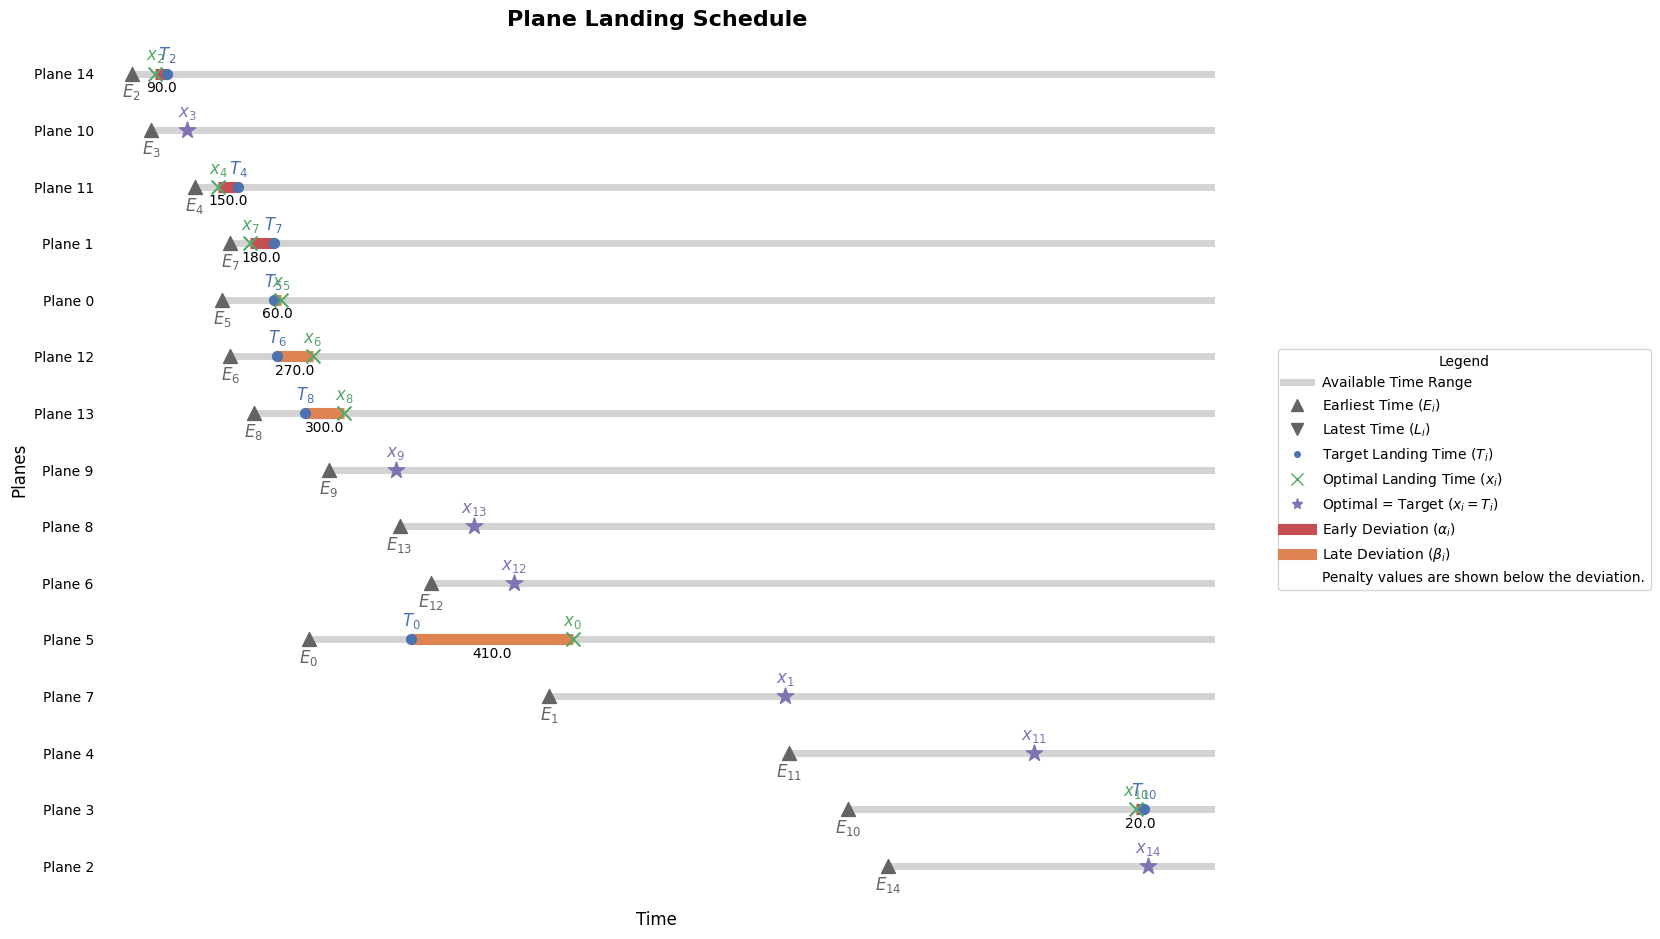

In [5]:
decision_strategies_single = [
    {
        "variables": "position",
        "variable_strategy": cp_model.CHOOSE_FIRST,        
        "value_strategy": cp_model.SELECT_MIN_VALUE      
    }
]

solver, variables,mem_before, mem_after = solve_single_runway_cp(num_planes, planes_data, separation_times, decision_strategies_single,
        hint=True, search_strategy=cp_model.FIXED_SEARCH)
metrics_CP_single_runway = performance_CP(solver, planes_data, mem_before, mem_after)

visualize_solution(solver, num_planes, planes_data, variables, approach="CP")

		     Creating CP model

-> Number of decision variables created: 165
-> Number of constraints: 511

			Solving CP

-> Optimal Cost: 1480.0

-> Planes that did not land on the target time:
  -> Plane 0: 196 | Target Time: 155 | Penalty: 410.0
  -> Plane 2: 90 | Target Time: 93 | Penalty: 90.0
  -> Plane 4: 106 | Target Time: 111 | Penalty: 150.0
  -> Plane 5: 114 | Target Time: 120 | Penalty: 180.0
  -> Plane 6: 122 | Target Time: 121 | Penalty: 30.0
  -> Plane 7: 138 | Target Time: 120 | Penalty: 540.0
  -> Plane 8: 130 | Target Time: 128 | Penalty: 60.0
  -> Plane 14: 344 | Target Time: 342 | Penalty: 20.0

		Performance Metrics for CP

-> Execution time (s): 0.27
-> Solution Status: OPTIMAL
-> Memory usage (MB): 0.86
-> Number of Conflicts: 0
-> Number of Branches: 772
-> Best objective bound: 1480.0



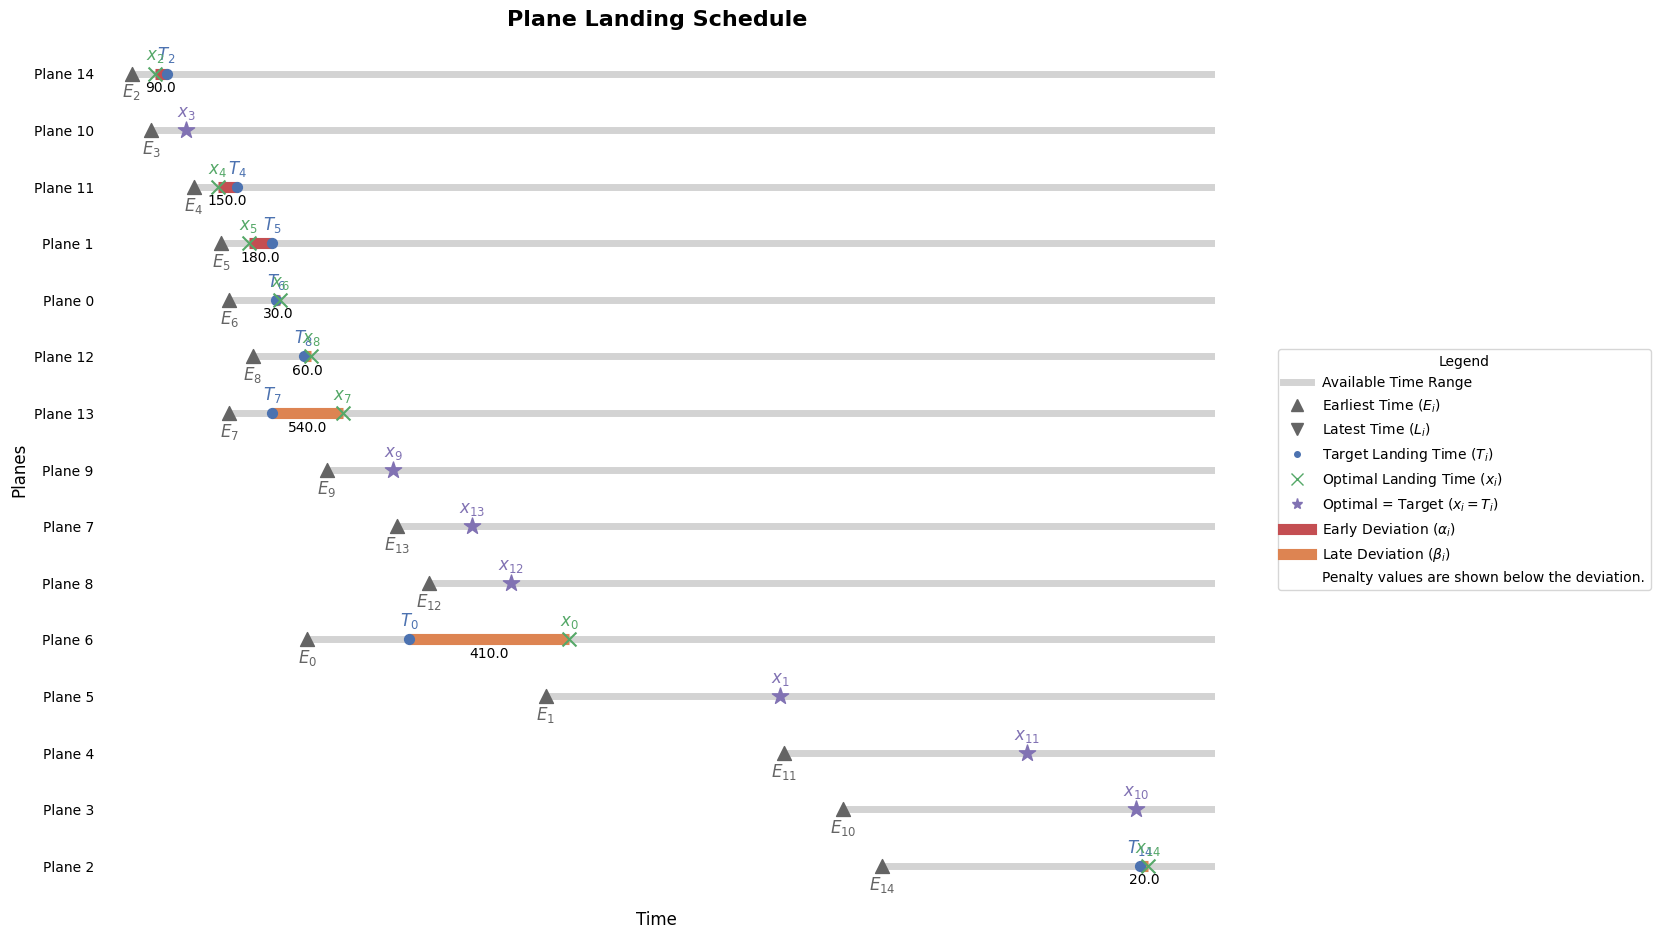

In [6]:
solver, variables, mem_before, mem_after = solve_single_runway_cp(num_planes, planes_data, separation_times, decision_strategies_single,hint=True)
metrics_CP_single_runway = performance_CP(solver, planes_data, mem_before, mem_after)

visualize_solution(solver, num_planes, planes_data, variables, approach="CP")

		    Creating MIP Solver

-> Number of decision variables created: 255
-> Number of constraints: 420

			Solving MIP

-> Optimal Cost: 1480.0

-> Planes that did not land on the target time:
  -> Plane 0: 196.0 | Target Time: 155 | Penalty: 410.0
  -> Plane 2: 90.0 | Target Time: 93 | Penalty: 90.0
  -> Plane 4: 106.0 | Target Time: 111 | Penalty: 150.0
  -> Plane 5: 114.0 | Target Time: 120 | Penalty: 180.0
  -> Plane 6: 122.0 | Target Time: 121 | Penalty: 30.0
  -> Plane 7: 138.0 | Target Time: 120 | Penalty: 540.0
  -> Plane 8: 130.0 | Target Time: 128 | Penalty: 60.0
  -> Plane 10: 339.0 | Target Time: 341 | Penalty: 20.0

		Performance Metrics for MIP

-> Execution time: 0.18 seconds
-> Number of variables in the model: 255
-> Number of constraints in the model: 420
-> Total penalty: 1480.0
-> Memory usage: 0.56 MB



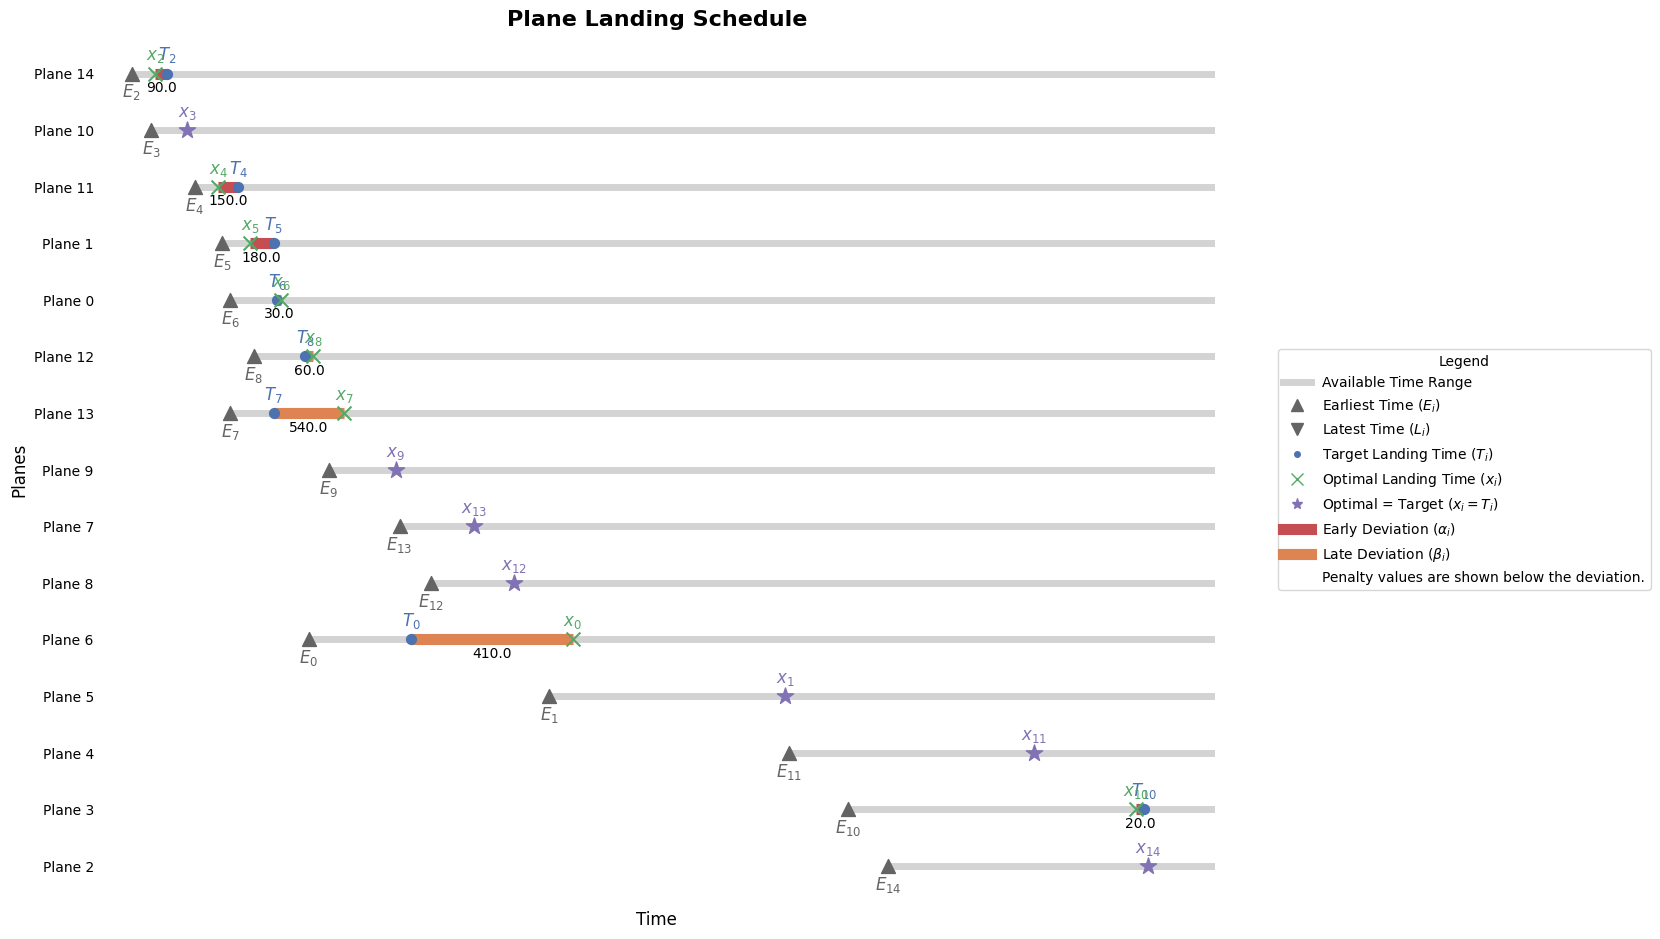

In [7]:
solver, variables, mem_before, mem_after = solve_single_runway_mip(num_planes, planes_data, separation_times)
metrics_MIP_single_runway = performance_MIP(solver, mem_before, mem_after)

visualize_solution(solver, num_planes, planes_data, variables, approach="MIP")

In [8]:
solver, memory_before, memory_after = solve_multiple_runways_mip(num_planes, num_runways, planes_data, separation_times)
metrics_MIP_multiple_runway = performance_MIP(solver, mem_before, mem_after)

		    Creating MIP Solver

-> Number of decision variables created: 495
-> Number of constraints: 750

			Solving MIP

-> Optimal Cost: 210.0

-> Planes that did not land on the target time:
  -> Plane 5: 113.0 | Target Time: 120 | Penalty: 210.0

		Performance Metrics for MIP

-> Execution time: 0.02 seconds
-> Number of variables in the model: 495
-> Number of constraints in the model: 750
-> Total penalty: 210.0
-> Memory usage: 0.56 MB



## Single Runway

In [9]:
import itertools
from ortools.sat.python import cp_model

# Assuming you have already defined the following functions:
# - solve_single_runway_cp
# - performance_CP

# Mapping strategies to their corresponding names
branching_strategies = [
    (cp_model.PORTFOLIO_SEARCH, "PORTFOLIO_SEARCH"),
    (cp_model.LP_SEARCH, "LP_SEARCH"),
    (cp_model.PSEUDO_COST_SEARCH, "PSEUDO_COST_SEARCH")
]

variables_strategies = [
    (cp_model.CHOOSE_MIN_DOMAIN_SIZE, "CHOOSE_MIN_DOMAIN_SIZE"),
    (cp_model.CHOOSE_MAX_DOMAIN_SIZE, "CHOOSE_MAX_DOMAIN_SIZE")
]

values_strategies = [
    (cp_model.SELECT_LOWER_HALF, "SELECT_LOWER_HALF"),
    (cp_model.SELECT_UPPER_HALF, "SELECT_UPPER_HALF")
]

# Number of runs per combination (similar to cross-validation)
num_runs = 5

# Prepare to store the results
results_cp_single = []

# Generate all possible combinations of strategies
all_combinations = list(itertools.product(branching_strategies, variables_strategies, values_strategies))

# Iterate over each combination of strategies
for (branching_strategy, branching_name), (var_strategy, var_name), (val_strategy, val_name) in all_combinations:
    print(f"Testing combination: Branching={branching_name}, Variable={var_name}, Value={val_name}")
    
    # Configure the decision strategies for a single runway
    decision_strategies_single = [
        {
            "variables": "position",  # Replace with your actual variable name
            "variable_strategy": var_strategy,
            "value_strategy": val_strategy
        },
        # Add more dictionaries if there are additional variables to configure
        # Example:
        # {
        #     "variables": "another_variable",
        #     "variable_strategy": cp_model.CHOOSE_FIRST,  # Another strategy
        #     "value_strategy": cp_model.SELECT_MIN_VALUE
        # }
    ]
    
    # Initialize accumulators for metrics
    sum_metrics = {}
    count_success = 0
    run_errors = []
    non_numeric_metrics = set()
    
    # Execute multiple runs for the same combination
    for run in range(1, num_runs + 1):
        print(f"  Run {run} of {num_runs}...")
        try:
            solver, variables, mem_before, mem_after = solve_single_runway_cp(
                num_planes,
                planes_data,
                separation_times,
                decision_strategies=decision_strategies_single,
                search_strategy=branching_strategy
            )
            
            # Retrieve performance metrics
            metrics = performance_CP(solver, planes_data, mem_before, mem_after)
            
            # Accumulate the metrics
            for key, value in metrics.items():
                if isinstance(value, (int, float)):
                    if key in sum_metrics:
                        sum_metrics[key] += value
                    else:
                        sum_metrics[key] = value
                else:
                    # Log non-numeric metrics
                    non_numeric_metrics.add(key)
            
            count_success += 1
        except Exception as e:
            error_message = f"Run {run} failed: {str(e)}"
            print(f"    Error: {error_message}")
            run_errors.append(error_message)
    
    # Calculate the average of the metrics if at least one run was successful
    if count_success > 0:
        average_metrics = {key: value / count_success for key, value in sum_metrics.items()}
        
        # Store the results with the strategy details and average metrics
        result = {
            "branching_strategy": branching_name,
            "variable_strategy": var_name,
            "value_strategy": val_name,
            "runs_successful": count_success,
            "runs_failed": num_runs - count_success
        }
        result.update(average_metrics)  # Add the averaged metrics to the result dictionary
        
        # Optionally, include details of any errors that occurred
        if run_errors:
            result["errors"] = "; ".join(run_errors)
        
        # Optionally, include non-numeric metrics
        if non_numeric_metrics:
            result["non_numeric_metrics"] = ", ".join(non_numeric_metrics)
        
        results_cp_single.append(result)
    else:
        # All runs failed for this combination
        error_result = {
            "branching_strategy": branching_name,
            "variable_strategy": var_name,
            "value_strategy": val_name,
            "runs_successful": 0,
            "runs_failed": num_runs,
            "error": "All runs failed."
        }
        results_cp_single.append(error_result)

# Optional: Print the averaged results for verification
print("\nAveraged Results for All Combinations (Single Runway):")
for res in results_cp_single:
    print(res)



Testing combination: Branching=PORTFOLIO_SEARCH, Variable=CHOOSE_MIN_DOMAIN_SIZE, Value=SELECT_LOWER_HALF
  Run 1 of 5...
		     Creating CP model

-> Number of decision variables created: 165
-> Number of constraints: 511

			Solving CP

-> Optimal Cost: 1480.0

-> Planes that did not land on the target time:
  -> Plane 0: 196 | Target Time: 155 | Penalty: 410.0
  -> Plane 2: 90 | Target Time: 93 | Penalty: 90.0
  -> Plane 4: 106 | Target Time: 111 | Penalty: 150.0
  -> Plane 5: 122 | Target Time: 120 | Penalty: 60.0
  -> Plane 6: 130 | Target Time: 121 | Penalty: 270.0
  -> Plane 7: 114 | Target Time: 120 | Penalty: 180.0
  -> Plane 8: 138 | Target Time: 128 | Penalty: 300.0
  -> Plane 14: 344 | Target Time: 342 | Penalty: 20.0

		Performance Metrics for CP

-> Execution time (s): 0.18
-> Solution Status: OPTIMAL
-> Memory usage (MB): 1.16
-> Number of Conflicts: 44
-> Number of Branches: 1203
-> Best objective bound: 1480.0

  Run 2 of 5...
		     Creating CP model

-> Number of dec

# Multiple Runway

In [10]:
import itertools
from ortools.sat.python import cp_model

# Assuming you have already defined the following functions:
# - solve_multiple_runways_cp
# - performance_CP

# Mapping strategies to their corresponding names
branching_strategies = [
    (cp_model.PORTFOLIO_SEARCH, "PORTFOLIO_SEARCH"),
    (cp_model.LP_SEARCH, "LP_SEARCH"),
    (cp_model.PSEUDO_COST_SEARCH, "PSEUDO_COST_SEARCH")
]

variables_strategies = [
    (cp_model.CHOOSE_MIN_DOMAIN_SIZE, "CHOOSE_MIN_DOMAIN_SIZE"),
    (cp_model.CHOOSE_MAX_DOMAIN_SIZE, "CHOOSE_MAX_DOMAIN_SIZE")
]

values_strategies = [
    (cp_model.SELECT_LOWER_HALF, "SELECT_LOWER_HALF"),
    (cp_model.SELECT_UPPER_HALF, "SELECT_UPPER_HALF")
]

# Number of runs per combination (similar to cross-validation)
num_runs = 5

# Prepare to store the results
results_cp_multiple = []

# Generate all possible combinations of strategies
all_combinations = list(itertools.product(branching_strategies, variables_strategies, values_strategies))

# Iterate over each combination of strategies
for (branching_strategy, branching_name), (var_strategy, var_name), (val_strategy, val_name) in all_combinations:
    print(f"Testing combination: Branching={branching_name}, Variable={var_name}, Value={val_name}")
    
    # Configure the decision strategies for multiple runways
    # Adjust the "variables" field based on your actual decision variables
    decision_strategies_multiple = [
        {
            "variables": "position",  # Replace with your actual variable name
            "variable_strategy": var_strategy,
            "value_strategy": val_strategy
        },
        # Add more dictionaries if there are additional variables to configure
        # Example:
        # {
        #     "variables": "another_variable",
        #     "variable_strategy": cp_model.CHOOSE_FIRST,  # Another strategy
        #     "value_strategy": cp_model.SELECT_MIN_VALUE
        # }
    ]
    
    # Initialize accumulators for metrics
    sum_metrics = {}
    count_success = 0
    run_errors = []
    non_numeric_metrics = set()
    
    # Execute multiple runs for the same combination
    for run in range(1, num_runs + 1):
        print(f"  Run {run} of {num_runs}...")
        try:
            solver, mem_before, mem_after = solve_multiple_runways_cp(
                num_planes,
                num_runways,
                planes_data,
                separation_times,
                decision_strategies=decision_strategies_multiple,
                search_strategy=branching_strategy
            )
            
            # Retrieve performance metrics
            metrics = performance_CP(solver, planes_data, mem_before, mem_after)
            
            # Accumulate the metrics
            for key, value in metrics.items():
                if isinstance(value, (int, float)):
                    if key in sum_metrics:
                        sum_metrics[key] += value
                    else:
                        sum_metrics[key] = value
                else:
                    # Log non-numeric metrics
                    non_numeric_metrics.add(key)
            
            count_success += 1
        except Exception as e:
            error_message = f"Run {run} failed: {str(e)}"
            print(f"    Error: {error_message}")
            run_errors.append(error_message)
    
    # Calculate the average of the metrics if at least one run was successful
    if count_success > 0:
        average_metrics = {key: value / count_success for key, value in sum_metrics.items()}
        
        # Store the results with the strategy details and average metrics
        result = {
            "branching_strategy": branching_name,
            "variable_strategy": var_name,
            "value_strategy": val_name,
            "runs_successful": count_success,
            "runs_failed": num_runs - count_success
        }
        result.update(average_metrics)  # Add the averaged metrics to the result dictionary
        
        # Optionally, include details of any errors that occurred
        if run_errors:
            result["errors"] = "; ".join(run_errors)
        
        # Optionally, include non-numeric metrics
        if non_numeric_metrics:
            result["non_numeric_metrics"] = ", ".join(non_numeric_metrics)
        
        results_cp_multiple.append(result)
    else:
        # All runs failed for this combination
        error_result = {
            "branching_strategy": branching_name,
            "variable_strategy": var_name,
            "value_strategy": val_name,
            "runs_successful": 0,
            "runs_failed": num_runs,
            "error": "All runs failed."
        }
        results_cp_multiple.append(error_result)

# Optional: Print the averaged results for verification
print("\nAveraged Results for All Combinations (Multiple Runways):")
for res in results_cp_multiple:
    print(res)



Testing combination: Branching=PORTFOLIO_SEARCH, Variable=CHOOSE_MIN_DOMAIN_SIZE, Value=SELECT_LOWER_HALF
  Run 1 of 5...
		     Creating CP model

-> Number of decision variables created: 285
-> Number of constraints: 721

			Solving CP

-> Optimal Cost: 210.0

-> Planes that did not land on the target time:
  -> Plane 5: 113 | Target Time: 120 | Penalty: 210.0

		Performance Metrics for CP

-> Execution time (s): 0.04
-> Solution Status: OPTIMAL
-> Memory usage (MB): 0.00
-> Number of Conflicts: 17
-> Number of Branches: 1511
-> Best objective bound: 210.0

  Run 2 of 5...
		     Creating CP model

-> Number of decision variables created: 285
-> Number of constraints: 721

			Solving CP

-> Optimal Cost: 210.0

-> Planes that did not land on the target time:
  -> Plane 5: 119 | Target Time: 120 | Penalty: 30.0
  -> Plane 6: 127 | Target Time: 121 | Penalty: 180.0

		Performance Metrics for CP

-> Execution time (s): 0.05
-> Solution Status: OPTIMAL
-> Memory usage (MB): 0.02
-> Numbe

# Dataframe

In [11]:
import pandas as pd

# -------------------------------
# Step 1: Convert Lists to DataFrames
# -------------------------------

# Convert results_cp_multiple to a DataFrame
df_cp_multiple = pd.DataFrame(results_cp_multiple)

# Convert results_cp_single to a DataFrame
df_cp_single = pd.DataFrame(results_cp_single)

# -------------------------------
# Step 2: Add 'runway_type' Column
# -------------------------------

# Add a new column 'runway_type' to indicate the scenario
df_cp_multiple['runway_type'] = 'multiple'
df_cp_single['runway_type'] = 'single'

# -------------------------------
# Step 3: Combine Both DataFrames
# -------------------------------

# Combine the two DataFrames into one
combined_df = pd.concat([df_cp_multiple, df_cp_single], ignore_index=True)

# Optional: Reorder columns to place 'runway_type' first for clarity
cols = ['runway_type'] + [col for col in combined_df.columns if col != 'runway_type']
combined_df = combined_df[cols]

# -------------------------------
# Step 4: Inspect the DataFrames
# -------------------------------

# Print the first few rows of the multiple runways DataFrame
print("Sample of Multiple Runways Results:")
print(df_cp_multiple.head())

# Print the first few rows of the single runway DataFrame
print("\nSample of Single Runway Results:")
print(df_cp_single.head())

# Print the first few rows of the combined DataFrame
print("\nSample of Combined Runway Results:")
print(combined_df.head())


Sample of Multiple Runways Results:
  branching_strategy       variable_strategy     value_strategy  \
0   PORTFOLIO_SEARCH  CHOOSE_MIN_DOMAIN_SIZE  SELECT_LOWER_HALF   
1   PORTFOLIO_SEARCH  CHOOSE_MIN_DOMAIN_SIZE  SELECT_UPPER_HALF   
2   PORTFOLIO_SEARCH  CHOOSE_MAX_DOMAIN_SIZE  SELECT_LOWER_HALF   
3   PORTFOLIO_SEARCH  CHOOSE_MAX_DOMAIN_SIZE  SELECT_UPPER_HALF   
4          LP_SEARCH  CHOOSE_MIN_DOMAIN_SIZE  SELECT_LOWER_HALF   

   runs_successful  runs_failed  exec_time  mem_usage  conflicts  branches  \
0                5            0   0.046673   0.009375        6.8     788.8   
1                5            0   0.046161   0.031250        6.4    1060.0   
2                5            0   0.047256   0.059375        0.0     448.4   
3                5            0   0.046453   0.128125        6.8    1075.2   
4                5            0   0.044384   0.009375       10.2    1171.4   

   best_objective non_numeric_metrics runway_type  
0           210.0              status   

In [15]:
df_cp_multiple.head()

,branching_strategy,variable_strategy,value_strategy,runs_successful,runs_failed,exec_time,mem_usage,conflicts,branches,best_objective,non_numeric_metrics,runway_type
0,PORTFOLIO_SEARCH,CHOOSE_MIN_DOMAIN_SIZE,SELECT_LOWER_HALF,5,0,0.046673,0.009375,6.8,788.8,210.0,status,multiple
1,PORTFOLIO_SEARCH,CHOOSE_MIN_DOMAIN_SIZE,SELECT_UPPER_HALF,5,0,0.046161,0.031250,6.4,1060.0,210.0,status,multiple
2,PORTFOLIO_SEARCH,CHOOSE_MAX_DOMAIN_SIZE,SELECT_LOWER_HALF,5,0,0.047256,0.059375,0.0,448.4,210.0,status,multiple
3,PORTFOLIO_SEARCH,CHOOSE_MAX_DOMAIN_SIZE,SELECT_UPPER_HALF,5,0,0.046453,0.128125,6.8,1075.2,210.0,status,multiple
4,LP_SEARCH,CHOOSE_MIN_DOMAIN_SIZE,SELECT_LOWER_HALF,5,0,0.044384,0.009375,10.2,1171.4,210.0,status,multiple


In [14]:
df_cp_single.head()

,branching_strategy,variable_strategy,value_strategy,runs_successful,runs_failed,exec_time,mem_usage,conflicts,branches,best_objective,non_numeric_metrics,runway_type
0,PORTFOLIO_SEARCH,CHOOSE_MIN_DOMAIN_SIZE,SELECT_LOWER_HALF,5,0,0.321235,1.009375,22.4,721.6,1480.0,status,single
1,PORTFOLIO_SEARCH,CHOOSE_MIN_DOMAIN_SIZE,SELECT_UPPER_HALF,5,0,0.454424,0.803125,10.0,740.2,1480.0,status,single
2,PORTFOLIO_SEARCH,CHOOSE_MAX_DOMAIN_SIZE,SELECT_LOWER_HALF,5,0,0.812540,-6.750000,30.0,1732.4,1480.0,status,single
3,PORTFOLIO_SEARCH,CHOOSE_MAX_DOMAIN_SIZE,SELECT_UPPER_HALF,5,0,0.555771,0.718750,21.2,1149.8,1480.0,status,single
4,LP_SEARCH,CHOOSE_MIN_DOMAIN_SIZE,SELECT_LOWER_HALF,5,0,0.334600,0.121875,10.0,292.2,1480.0,status,single


In [16]:
combined_df.head()

,runway_type,branching_strategy,variable_strategy,value_strategy,runs_successful,runs_failed,exec_time,mem_usage,conflicts,branches,best_objective,non_numeric_metrics
0,multiple,PORTFOLIO_SEARCH,CHOOSE_MIN_DOMAIN_SIZE,SELECT_LOWER_HALF,5,0,0.046673,0.009375,6.8,788.8,210.0,status
1,multiple,PORTFOLIO_SEARCH,CHOOSE_MIN_DOMAIN_SIZE,SELECT_UPPER_HALF,5,0,0.046161,0.031250,6.4,1060.0,210.0,status
2,multiple,PORTFOLIO_SEARCH,CHOOSE_MAX_DOMAIN_SIZE,SELECT_LOWER_HALF,5,0,0.047256,0.059375,0.0,448.4,210.0,status
3,multiple,PORTFOLIO_SEARCH,CHOOSE_MAX_DOMAIN_SIZE,SELECT_UPPER_HALF,5,0,0.046453,0.128125,6.8,1075.2,210.0,status
4,multiple,LP_SEARCH,CHOOSE_MIN_DOMAIN_SIZE,SELECT_LOWER_HALF,5,0,0.044384,0.009375,10.2,1171.4,210.0,status
